# Lab02 
### TDS3651 Visual Information Processing


This lab introduces image filtering, with particular focus on basic tasks like smoothing (or blurring), and sharpening. This lab is primarily guided (in many portions) while it also contains sections that you are require to complete. 

## Image Smoothing

Image smoothing is achieved by convolving an image with a smoothing filter kernel. Some sources refer to these type of kernels as a *low-pass* filter kernel. Generally, smoothing an image removes noises but it also removes other "high frequency" content that may be important, such as edges and ridges from the image structure. (Well, there are techniques that blur edges to a lesser extent). OpenCV provides four built-in smoothing/blurring techniques.

### Built-in Blurring Functions

First, load the necessary libraries...

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Next, let's read the `redflower.jpg` image we have previously used. For colour images, remember to convert the channel ordering from BGR to RGB so that `matplotlib` display functions show the right colours.


In [60]:
img = cv2.imread('redflower.jpg')  
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# If you use OpenCV's imshow function (which pops up a separate window instead), you should not convert from BGR to RGB
# because it takes care of the channel ordering automatically
#    cv2.imshow('img',img)
#    cv2.waitKey(0)
#    cv2.destroyAllWindows()

blur1 = cv2.blur(img,(5,5))     # 5x5 kernel filter, try other values

This blurs the image using a 5x5 averaging filter, define as:
$$H = \frac{1}{25}\begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}$$

Display the two images side-by-side in subplots,

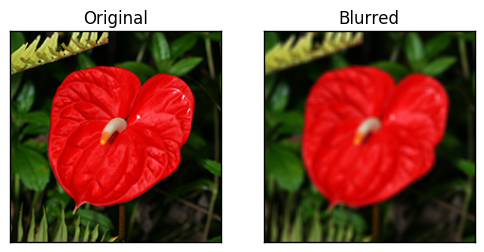

In [53]:
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur1),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

The same effect can be achieved using [`cv2.boxFilter()`](http://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gad533230ebf2d42509547d514f7d3fbc3). Try it.

In [54]:
blur2 = cv2.GaussianBlur(img,(5,5),0)

Smoothing with Gaussian filter can be performed using the function, [`cv2.GaussianBlur()`](http://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1). We should specify the `width` and `height` of kernel, which should be positive and odd. We also should specify the standard deviation in X and Y direction, `sigmaX` and `sigmaY` respectively. If only `sigmaX` is specified, `sigmaY` is taken as same as `sigmaX`. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is a highly effective method for removing gaussian noise from the image. To obtain the Gaussian kernel, you can use the function [`cv2.GaussianKernel()`](http://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa).

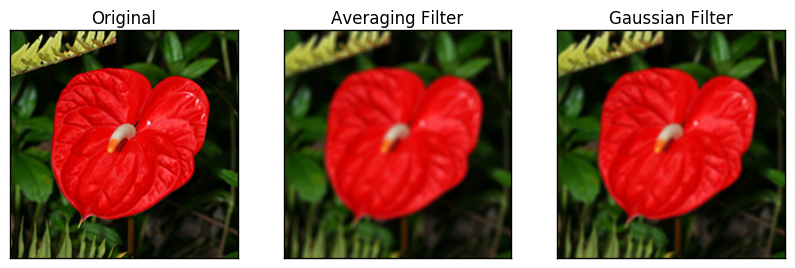

In [55]:
plt.figure(figsize=(10,5))
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur1),plt.title('Averaging Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur2),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

The median filter is a non-linear filter that takes the median of all pixels under the kernel neighborhood and replaces the central element with this median value. In most filtering procedures, the central element is a newly calculated value which may be a new pixel value. But in median blurring, the central element is always replaced by some pixel value in the image within the defined neighborhood. This reduces the noise effectively, particularly salt-and-pepper noise. Its kernel size should be a positive odd integer.

In [56]:
blur3 = cv2.medianBlur(img,5)

In [57]:
##### Q1 construct histogram for visualization
# img = img.astype('float32')
# histogram = cv2.calcHist([img], [3], None, 255, [0,256])

SystemError: <built-in function calcHist> returned NULL without setting an error

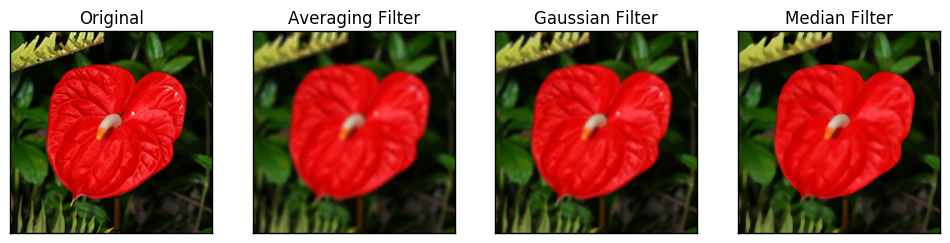

In [61]:
plt.figure(figsize=(12,6))
plt.subplot(141),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(blur1),plt.title('Averaging Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(blur2),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(blur3),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

**Q1**: What can you observe from the outcome of all three smoothing filters (all have same kernel size of 5x5)?


**Q2**: You are given two noise-ridden images of Lena. Use appropriate filters (with appropriate kernel size and parameters) to remove the noise as best as you could.


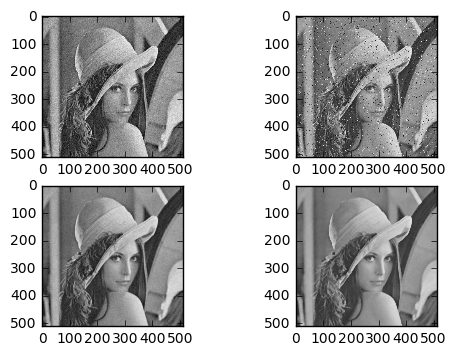

In [62]:
lena_noisy1 = cv2.imread('lena_gaussianNoise.png')
lena_noisy2 = cv2.imread('lena_spNoise.png')
lena_processing1 = cv2.GaussianBlur(lena_noisy1,(5,5),0)
lena_processing2 = cv2.medianBlur(lena_noisy2, 5)



plt.subplot(221), plt.imshow(lena_noisy1)
plt.subplot(222), plt.imshow(lena_noisy2)
plt.subplot(223), plt.imshow(lena_processing1)
plt.subplot(224), plt.imshow(lena_processing2)
plt.show()

### Defining Kernels


What if we wish to define our own filters? OpenCV provides a function [`cv2.filter2D()`](http://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) to convolve a kernel with an image. So, all we need to do is to define the filter in array form. 

Let's try to manually create a 5x5 averaging filter kernel (which is similar to that done earlier), 
$$H = \frac{1}{25}\begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}$$
and then convolve it with an image to perform filtering.

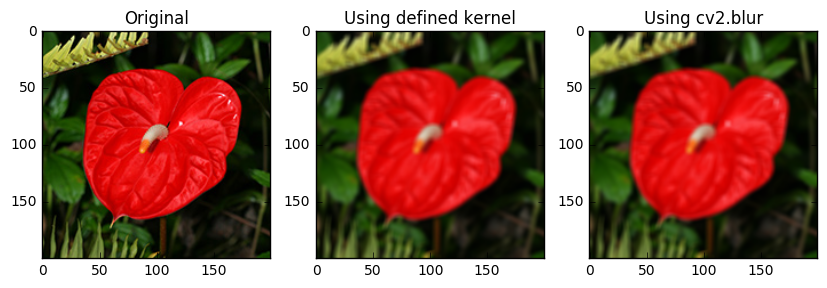

In [63]:
kernel = np.ones((5,5),np.float32)/25

filtered = cv2.filter2D(img,-1,kernel) # find out from doc what these parameters mean...also, there are other parameters not used

plt.figure(figsize=(10,5))
plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.subplot(132), plt.imshow(filtered), plt.title('Using defined kernel')
plt.subplot(133), plt.imshow(blur1), plt.title('Using cv2.blur')
plt.show()

**Q3**: How about trying out these other kernels?
$$H_1 = \frac{1}{16}\begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix}$$
$$H_2 = \frac{1}{25}\begin{bmatrix} 0 & 0 & 1 & 0 & 0 \\ 0 & 2 & 2 & 2 & 0 \\ 1 & 2 & 5 & 2 & 1 \\ 0 & 2 & 2 & 2 & 0 \\ 0 & 0 & 1 & 0 & 0 \end{bmatrix}$$


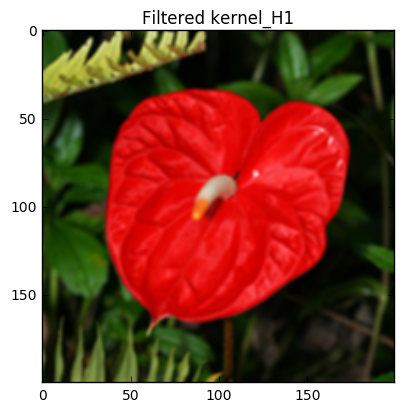

In [64]:
# Question3 #
kernel_H1 = np.empty([3,3])
kernel_H1 = np.array([[1,2,1], [2,4,2], [1,2,1]])
kernel_H1 = kernel_H1 / 16

# write for kernel_H2

filtered_H1 = cv2.filter2D(img,-1,kernel_H1)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(filtered_H1), plt.title('Filtered kernel_H1')
plt.show()

## Image Sharpening

Sharpening is the opposite process of smoothing, where the details of an image are accentuated to produce a sharpened image. This process can be accomplished by first obtaining the "details" of an image, by subtracting a smoothened image from the original image. Then, these "details" can be added back to the original image to produce the sharpened output image. 

Let's first generate a blur version of the `lena.jpg` image, and we shall attempt to sharpen it.

In [108]:
lena = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
blurlena = cv2.GaussianBlur(lena,(13,13),0)   # let's make it blurrer than usual

Next, we shall perform sharpening.

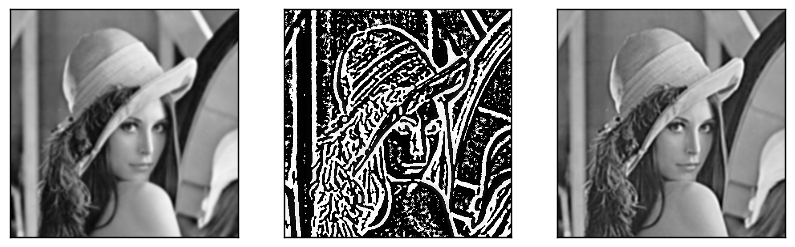

In [109]:
sm = cv2.blur(blurlena,(11,11))
details = blurlena - sm;
shp = blurlena + details;

plt.figure(figsize=(10,5))
plt.subplot(131), plt.imshow(blurlena, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(details, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(shp, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

Is the sharpening effect obvious enough? [Hint: Look at the hair area, and above the lips area]

**Q4**: What happens when you use a very large size smoothing filter kernel to extract the details needed for sharpening?

**Q5**: Try sharpening the `redflower` image (which is a colour image). What can you observe?

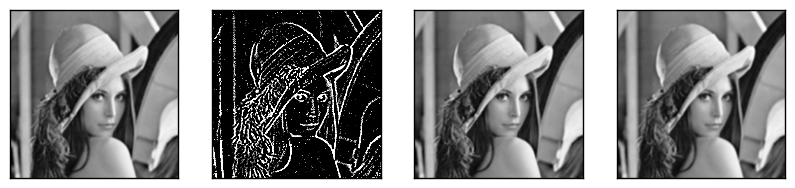

In [75]:
# Question 4 #
sm = cv2.blur(blurlena,(30,30))
details = blurlena - sm;
shp = blurlena + details;

plt.figure(figsize=(10,5))
plt.subplot(141), plt.imshow(blurlena, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(details, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(shp, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(sm, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

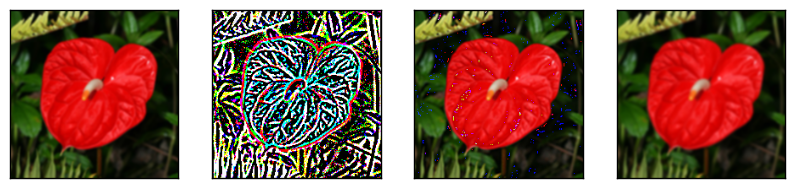

In [97]:
# Question 5 #
lena = cv2.imread('redflower.jpg')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB) 
blurlena = cv2.GaussianBlur(lena,(5,5),0)   # let's make it blurrer than usual
sm = cv2.blur(blurlena,(3,3))
details = blurlena - sm;
shp = blurlena + details;

plt.figure(figsize=(10,5))
plt.subplot(141), plt.imshow(blurlena, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(details, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(shp, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(sm, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

### Padding before Filtering

Explore [`numpy.pad`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html) function to try out different padding styles which can have a varying degree of effect on the image border after filtering.

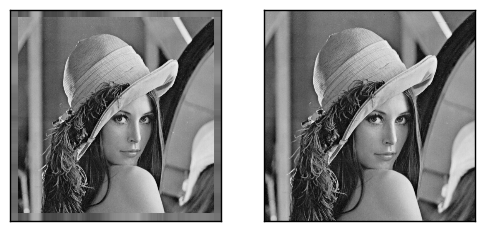

In [137]:
image_pad = np.pad(lena, 20, 'mean')
plt.figure
plt.subplot(121), plt.imshow(image_pad, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(lena, cmap= 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

**Q6**: Do the earlier operations using `cv2.blur`, `cv2.filter2D`, etc. perform any padding during filtering? Investigate this.

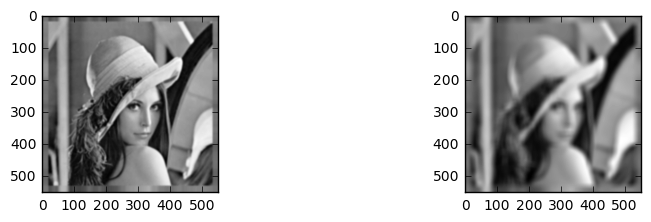

In [141]:
image_pad_gaussian = cv2.GaussianBlur(image_pad, (13,13), 0)
image_pad_blur = cv2.blur(image_pad_gaussian, (20,20))
plt.figure(figsize=(10,5))
plt.subplot(221), plt.imshow(image_pad_gaussian, cmap='gray')
plt.subplot(222), plt.imshow(image_pad_blur, cmap='gray')
plt.show()

## Additional Exercises


**Q1**. Implement a function for the *alpha-trimmed mean filter*. You can use back the blurred Lena image we used earlier.

Hint: We need two loops to slide the window (corresponding to the kernel neighborhood) across the entire image


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


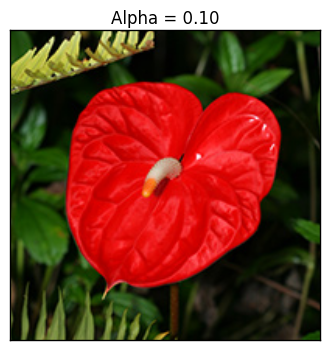

(<matplotlib.image.AxesImage at 0x229e0cf9518>,
 None)

In [149]:
def alphaTrimmedMean(im,alpha,n=5):
    # im: input image
    # alpha: alpha coefficient (between 0 and 1) defining the proportion of elements to be trimmed
    # n: default kernel size (default value 5)
    
    
    k = int((n-1)/2)   # half a kernel window. This value will be useful!
    
    # COMPLETE THE REST OF THE FUNCTION -----------------------------------------------------------
    # pad with k pixels on all sides
    padding = np.pad(im, 20, 'constant', constant_values = k)
    
    # create output image filled with zeros (preparation)
    output_img = np.zeros(im.shape)
    
    # calculate the amount of trim, b --> the number of elements to trim from each end
    #### sort from lowest values to highest values, then use b to trim off the front and back part
    
    # process the image, pixel by pixel
    for i in range(k,im.shape[0]):
        for j in range(k,im.shape[1]):
            
            # extract the window area
            block = im[max(i-k,0):min(i+k,im.shape[0]), max(j-k,0):min(j+k,im.shape[1])]

            # reshape the neighborhood into a vector by flattening the 2D block
            wB = block.flatten()
            
            # sort the neighborhood vector in ascending order

            
            # trim b elements from each end of the vector
  
    
            # calculate mean of the trimmed vector


            # assign the calculated mean value to the central pixel location

    return img

alpha = 0.1
enh_lena = alphaTrimmedMean(blurlena, alpha)
plt.xticks([]), plt.yticks([])
plt.imshow(enh_lena, cmap='gray'), plt.title('Alpha = %.2f'%alpha), plt.show()

Q2. **Halftoning** - Dithering effect
Halftoning is a reprographic technique that simulates continuous tone imagery through the use of dots, varying either in size or in spacing, thus generating a gradient-like effect. Where continuous tone imagery contains an infinite range of colors or greys, the halftone process reduces visual reproductions to an image that is printed with only one color of ink. (definition from [Wikipedia](https://en.wikipedia.org/wiki/Halftone)). "Dithering" is a type of halftoning technique, which converts a greyscale image to black and white, such that the density of black dots in the new image approximates the average grey level in the original.
![Halftoning Example](halftoning_example.png)
The whole idea here is to access pixels spaced at a certain fixed interval. At each of these pixels, put a "drop of ink" that corresponds to its intensity value. A darker pixel should be painted with a larger drop of ink, and vice versa.


In [ ]:
# Create a function `halftoning`. Think of what inputs are needed to produce a halftone image. Spacing interval?
# Number of dot patterns to quantize the intensity values into? 


